In [18]:
import glob
from tools.compress import load

data = []

for file in glob.glob("./results-*.json"):
    print(file)
    try:
        d = load(file)
    except Exception:
        continue
    for experiment in d:
        data.append({
            "perfect": experiment["probas"].count(1.0)/len(experiment["probas"]),
            "mean": sum(experiment["probas"])/len(experiment["probas"]),
            "exp": len(experiment["probas"]),
            "gap": experiment["gap"],
            "year": experiment["date"],
            "author": experiment["author"],
            "reverse": "True" in file
        })


./results-bdi-1-False.json
./results-bdi-10-False.json
./results-bdi-15-False.json
./results-bdi-15-True.json
./results-bdi-5-False.json
./results-bdi-5-True.json
./results-bdi-10-True.json
./results-bdi-1-True.json


In [21]:
import pandas as pd

df = pd.DataFrame(data)

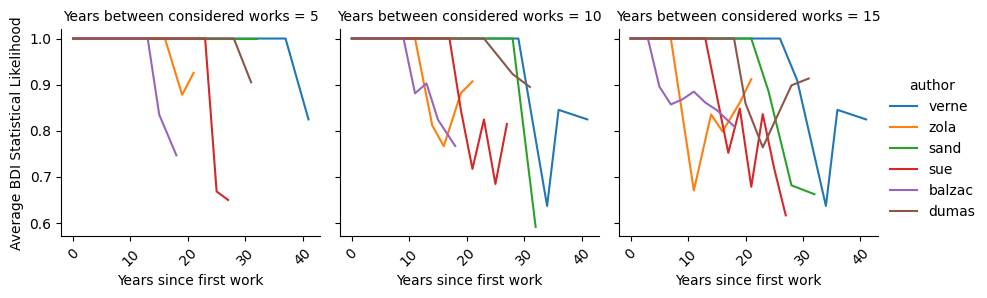

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
df["relative_year"] = df.groupby("author")["year"].transform(lambda x: x - x.min())

# Create a FacetGrid with one facet per 'gap' value
g = sns.FacetGrid(df[df.gap>1], col="gap", hue="author", sharey=True, sharex=True, col_wrap=3)

# Map a lineplot to each facet
g.map(sns.lineplot, "relative_year", "mean")

# Add a legend
g.add_legend()

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.set_xlabel("Years since first work")
    ax.set_ylabel("Average BDI Statistical Likelihood")
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_titles(col_template="Years between considered works = {col_name}")

# Adjust layout
# g.tight_layout()

plt.savefig("normalized_plot_bdi.png", dpi=300, bbox_inches='tight')
plt.show()


,full-100,mean,expes,gap,year,author,reverse
129,0.0,0.824432,44,10,1904,verne,False
131,0.0,0.845160,50,10,1899,verne,False
134,0.0,0.636460,50,10,1897,verne,False
152,0.0,0.906880,50,10,1892,zola,False
155,0.0,0.881720,50,10,1890,zola,False
157,0.0,0.766240,50,10,1887,zola,False
158,0.0,0.811340,50,10,1885,zola,False
169,0.0,0.590971,34,10,1866,sand,False
182,0.0,0.814500,12,10,1857,sue,False
184,0.0,0.684235,17,10,1855,sue,False
